In [ ]:
"""
keras dataset mnist digits classification has been used for 
--Dense NN has been tested for digits classification, 
--convolutional neural network (CNN) has been tasted for classification of flowers  has been tested for digits classification, 
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.metrics import classification_report

2024-09-01 16:22:01.496663: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(xtrain, ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
xtrain=xtrain/255
xtest=xtest/255

In [4]:
print(len(xtrain)+len(xtest))

70000


4


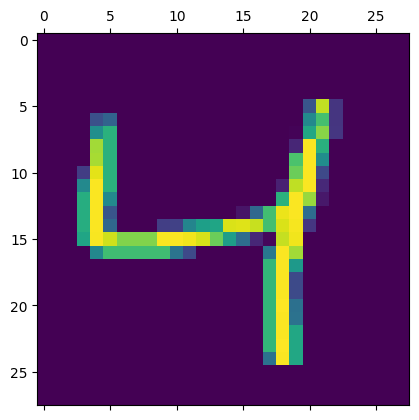

In [7]:
plt.matshow(xtrain[2])
print(ytrain[2])

# Use Dense Nural Network for modelling and TensorBoard to fit the hyper parameters

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    #keras.layers.Dropout(0.5), 
    keras.layers.Dense(10, activation='softmax'),
]) 


tf_callback=tf.keras.callbacks.TensorBoard(log_dir="TensorBoard/mnist-dataset",histogram_freq=10)


model.compile(optimizer='adam', # SGD: stochastic Gradient decent 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

               
model.fit(xtrain, ytrain, epochs=10, callbacks=[tf_callback]) # batch_size=15 for mini batch_GD 

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2763 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1247 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [8]:
%load_ext tensorboard 
%tensorboard --logdir TensorBoard/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23937), started 0:00:28 ago. (Use '!kill 23937' to kill it.)

#use Dropout layer to check for overfitting of model by randomly drop 0.5 of neruns

In [9]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9759


[0.0850880965590477, 0.9758999943733215]

313/313 [==============================] - 0s 1ms/step


<Axes: >

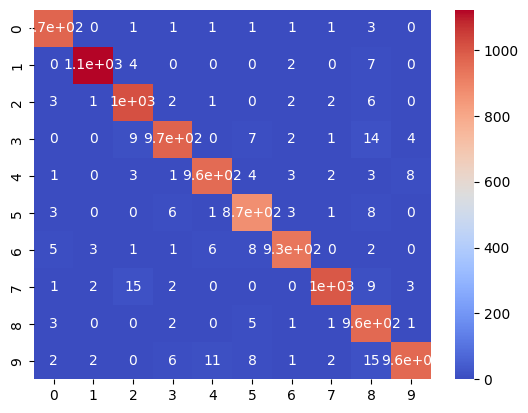

In [20]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.93      0.99      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Use convolutional neural network (CNN) for modeling

In [32]:
xtrain_reshape=xtrain.reshape(-1,28,28,1)
xtest_reshape=xtest.reshape(-1,28,28,1)

In [37]:
model=keras.Sequential([
    #padding 'valid': No padding and 'same' padding that output is the same size of input
    keras.layers.Conv2D(filters=28,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'),
    keras.layers.MaxPool2D((2,2)), #keras.layers.AveragePooling2D  
    keras.layers.Conv2D(filters=56,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(56,activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [38]:
model.fit(xtrain_reshape,ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1430 - accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0463 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0325 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0090 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [39]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9902


[0.03749600797891617, 0.9901999831199646]

313/313 [==============================] - 1s 4ms/step


<Axes: >

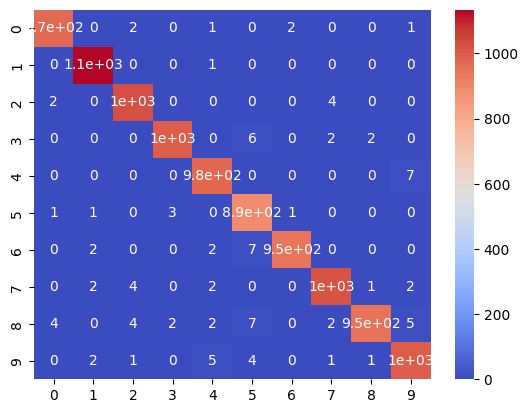

In [40]:
ypred=model.predict(xtest)
ypred=[np.argmax(i) for i in ypred]
cm=tf.math.confusion_matrix(ytest,ypred)
sns.heatmap(cm, annot=True, cmap="coolwarm")

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

